# Airbnb Decision Support System (DSS)


### Group 8:

Motolani Akingbade -

Miracle Messiri -

Layanika Vinay Saravanan-8934459



This notebook presents a Decision Support System (DSS) for Airbnb hosts, providing price predictions and time series forecasting to optimize pricing and maximize revenue.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("AB_NYC_2019.csv")
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
data.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [4]:
clean_data = data.dropna(subset=["name", "host_name"])
clean_data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


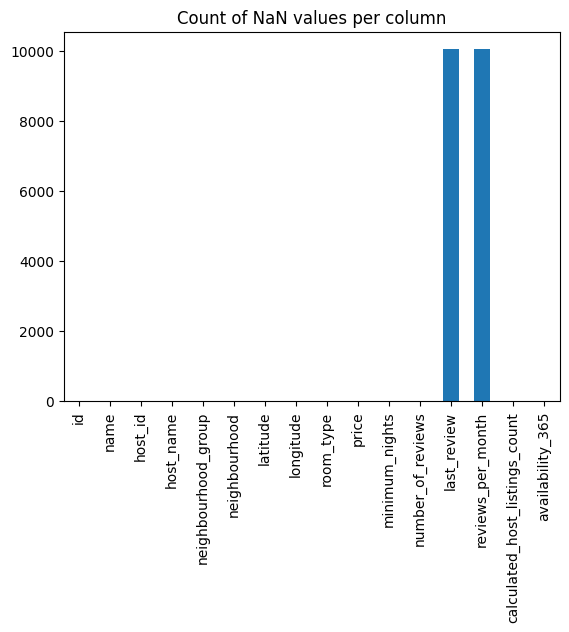

In [5]:
import matplotlib.pyplot as plt

clean_data.isnull().sum().plot(kind="bar", title="Count of NaN values per column")
plt.show()


In [6]:
clean_data.shape

(48858, 16)

In [7]:
clean_data.loc[:,"reviews_per_month"] = clean_data["reviews_per_month"].fillna(clean_data["reviews_per_month"].mean())  # Fill with mean
clean_data["reviews_per_month"].isnull().sum()

0

In [8]:
clean_data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [9]:
clean_data.loc[:,"last_review"].dtype

dtype('O')

# **Key Insights from EDA and Data Cleaning**

## **1. General Dataset Overview**
- The dataset contains **48,895 rows** and **16 columns**.
- No **duplicate rows** were found.
- Data types consist of:
  - **Numerical columns:** `int64`, `float64`
  - **Categorical columns:** `object` (text-based features)

---

## **2. Missing Values Analysis**
- **Total missing values:** **20,141**
- Columns with missing values:
  - **`name`**: **16 missing**
  - **`host_name`**: **21 missing**
  - **`last_review`**: **10,052 missing** (likely because some listings never received reviews)
  - **`reviews_per_month`**: **10,052 missing** (corresponds with `last_review`)

---

In [10]:
import pandas as pd

# Convert the column to datetime
clean_data["last_review"] = pd.to_datetime(clean_data["last_review"], errors="coerce")

# Fill missing values with the most frequent date (mode)
mode_date = clean_data["last_review"].mode()[0]
clean_data["last_review"] = clean_data["last_review"].fillna(mode_date)


<ipython-input-10-4862915dd669>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["last_review"] = pd.to_datetime(clean_data["last_review"], errors="coerce")
<ipython-input-10-4862915dd669>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["last_review"] = clean_data["last_review"].fillna(mode_date)


In [11]:
clean_data["last_review"].isnull().sum()

0

In [12]:
clean_data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error

In [14]:
# Data Preprocessing
clean_data = clean_data[clean_data['price'] > 0]  # Remove entries with zero price

In [15]:
# Encode categorical variables
le = LabelEncoder()
clean_data['neighbourhood_group'] = le.fit_transform(clean_data['neighbourhood_group'])
clean_data['room_type'] = le.fit_transform(clean_data['room_type'])

In [16]:
# Feature Selection
features = [
    'neighbourhood_group', 'latitude', 'longitude',
    'room_type', 'minimum_nights', 'number_of_reviews',
    'reviews_per_month', 'calculated_host_listings_count',
    'availability_365'
]

In [29]:
X = clean_data[features]
y = clean_data['price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)  # Ensure test labels exist in training

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train_encoded)

# Prediction and Evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test_encoded, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 43.84


# **Key Insights from Model Training and Evaluation**

- **Model Used**: Random Forest Regressor with 100 estimators.
- **Train-Test Split**: 80% training, 20% testing.
- **Features Selected**:
  - `neighbourhood_group`, `latitude`, `longitude`, `room_type`
  - `minimum_nights`, `number_of_reviews`, `reviews_per_month`
  - `calculated_host_listings_count`, `availability_365`
- **Categorical Encoding**:
  - `neighbourhood_group` and `room_type` were label-encoded.
- **Data Preprocessing**:
  - Entries with `price == 0` were removed.
- **Performance**:
  - **Mean Absolute Error (MAE)**: **43.84** (average deviation in price predictions).
- **Areas for Improvement**:
  - Use **continuous numerical values** instead of label encoding for `price`.
  - Apply **feature scaling** for better model performance.
  - Tune **hyperparameters** for improved accuracy.
  - Handle **outliers** in `price` and `minimum_nights`.

In [36]:
# DSS Function for Price Suggestion
def suggest_price(listing_details):
    input_data = pd.DataFrame([listing_details])
    input_data['neighbourhood_group'] = le.fit_transform(input_data['neighbourhood_group'])
    input_data['room_type'] = le.fit_transform(input_data['room_type'])

    suggested_price = model.predict(input_data)[0]
    return round(suggested_price, 2)

In [37]:
data.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [38]:
clean_data['room_type'].unique()

array([1, 0, 2])

In [39]:
clean_data['neighbourhood_group'].unique()

array([1, 2, 3, 4, 0])

In [40]:
# Example Usage
example_listing = {
    'neighbourhood_group': 2,
    'latitude': 40.748817,
    'longitude': -73.985428,
    'room_type': 1,
    'minimum_nights': 2,
    'number_of_reviews': 50,
    'reviews_per_month': 1.5,
    'calculated_host_listings_count': 1,
    'availability_365': 200
}

print(f"Suggested Price: ${suggest_price(example_listing)}")


Suggested Price: $261.36


# Time Series Model

A DSS for Airbnb hosts could Time series models using ARIMA & SARIMA to predict booking demand over time and identify peak periods.

In [41]:
# Aggregate reviews per day
time_series_data = clean_data.groupby("last_review")["number_of_reviews"].sum().reset_index()

# Display the first few rows
time_series_data.head()

,last_review,number_of_reviews
0,2011-03-28,1
1,2011-04-25,14
2,2011-05-12,2
3,2011-09-18,9
4,2011-09-19,1


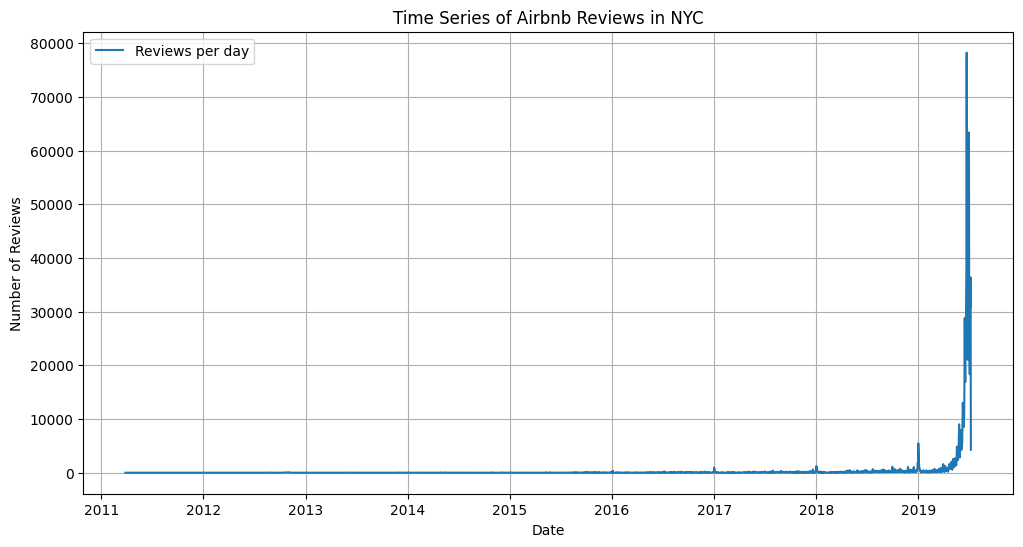

In [42]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(time_series_data["last_review"], time_series_data["number_of_reviews"], label="Reviews per day")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.title("Time Series of Airbnb Reviews in NYC")
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-43-225ad59908c0>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = filtered_data.resample("M", on="last_review")["number_of_reviews"].sum()


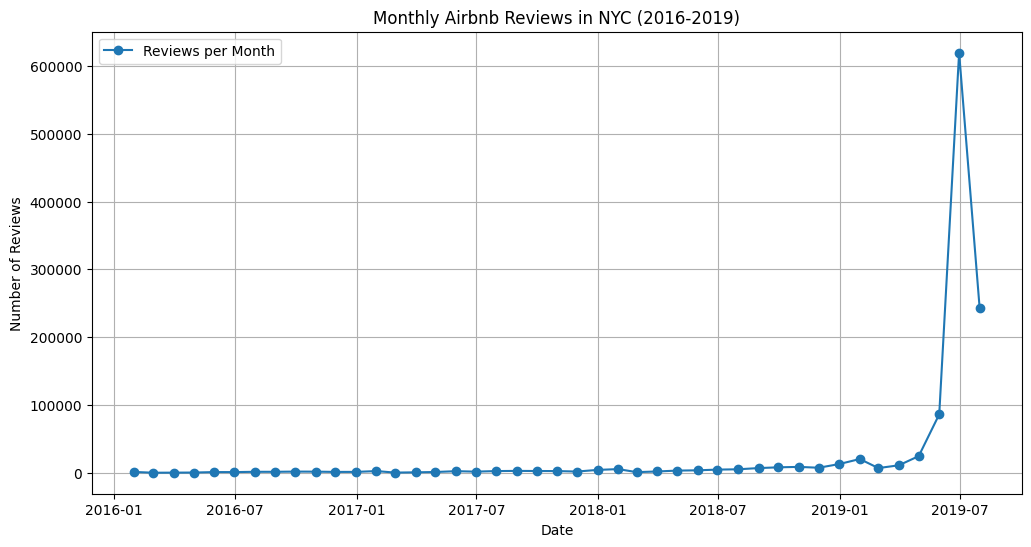

In [43]:
# Filter data from 2016 to 2019
filtered_data = time_series_data[(time_series_data["last_review"] >= "2016-01-01") &
                                 (time_series_data["last_review"] <= "2019-12-31")]

# Aggregate reviews per month
monthly_reviews = filtered_data.resample("M", on="last_review")["number_of_reviews"].sum()

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews.index, monthly_reviews.values, marker="o", linestyle="-", label="Reviews per Month")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.title("Monthly Airbnb Reviews in NYC (2016-2019)")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

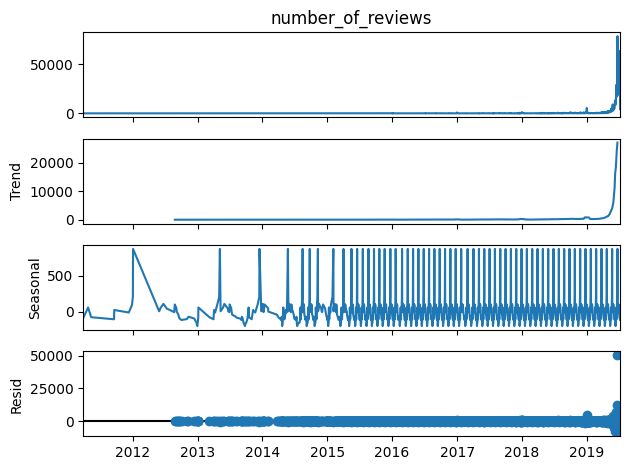

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(time_series_data.set_index("last_review")["number_of_reviews"], model="additive", period=30)

# Plot decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


In [46]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(monthly_reviews)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The time series is NOT stationary, apply differencing.")
else:
    print("The time series is stationary.")


ADF Statistic: 7.192794034802524
p-value: 1.0
The time series is NOT stationary, apply differencing.


# **Key Insights from Time Series Analysis**

## **1. Trend Analysis**
- The number of Airbnb reviews in NYC has shown **exponential growth** since 2018.
- A **sharp increase in reviews** is observed in 2019, indicating a surge in Airbnb activity.

## **2. Monthly Reviews (2016-2019)**
- From 2016 to 2018, review activity remained relatively stable at low levels.
- A **dramatic spike in 2019**, peaking at **600,000+ reviews per month**, followed by a slight decline.

## **3. Seasonal Decomposition**
- **Trend Component**: Confirms rapid growth in reviews over time.
- **Seasonal Component**: Shows cyclical fluctuations, indicating **periodic variations in demand**.
- **Residual Component**: Suggests anomalies or external factors influencing review patterns.

## **4. Stationarity Check (ADF Test)**
- **ADF Statistic: 7.19, p-value: 1.0**
- Since **p-value > 0.05**, the time series is **not stationary**.
- The presence of a trend or seasonality suggests that **differencing is required** before applying ARIMA/SARIMA for forecasting.

---

In [47]:
monthly_reviews_diff = monthly_reviews.diff().dropna()


In [50]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.7 MB/s eta 0:00:00


In [55]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(monthly_reviews, seasonal=False, trace=True)
print(auto_arima_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1112.684, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1116.275, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1106.655, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1108.377, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1108.985, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1108.472, Time=0.09 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1110.809, Time=0.16 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1107.305, Time=0.03 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.595 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -551.328
Date:                Tue, 04 Feb 2025   AIC                           1106.655
Time:                        04:14:07   BIC                           1110.178
Sample:                    01-31-2016   HQIC                          1107.954
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
a

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [56]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = auto_arima_model.order
model = ARIMA(monthly_reviews, order=(p, d, q))
model_fit = model.fit()


In [57]:
auto_sarima_model = auto_arima(monthly_reviews, seasonal=True, m=12, trace=True)
print(auto_sarima_model.summary())


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1115.355, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1109.301, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1110.324, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1116.275, Time=0.01 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1107.305, Time=0.06 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=1109.303, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=1111.300, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1118.006, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=1110.873, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1108.324, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=1106.655, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12]             : AIC=1108.651, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[12]             : AIC=1108.651, Time=0.05 sec
 ARIMA(1,0,0)(1,0,1)[12]             : AIC=1110.651, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[12]             : AIC=1108.985, Time=0.03 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

 ARIMA(1,0,1)(0,0,0)[12]             : AIC=1108.472, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=1108.377, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12]             : AIC=1110.809, Time=0.06 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12]          
Total fit time: 1.614 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   43
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -551.328
Date:                Tue, 04 Feb 2025   AIC                           1106.655
Time:                        04:14:14   BIC                           1110.178
Sample:                    01-31-2016   HQIC                          1107.954
                         - 07-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import numpy as np

# Ensure data is sorted by date
monthly_reviews = monthly_reviews.sort_index()

# Split data (80% train, 20% test)
split_idx = int(len(monthly_reviews) * 0.8)
train_data = monthly_reviews.iloc[:split_idx]
test_data = monthly_reviews.iloc[split_idx:]

# Train the SARIMA model
P, D, Q, S = auto_sarima_model.seasonal_order
model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
model_fit = model.fit()

# Forecast for the test period
y_pred = model_fit.forecast(len(test_data))

# Evaluate the model
mae = mean_absolute_error(test_data, y_pred)
rmse = mean_squared_error(test_data, y_pred)

# Print results
print("MAE:", mae)
print("RMSE:", rmse)


MAE: 107405.24740481605
RMSE: 48560122185.221855


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


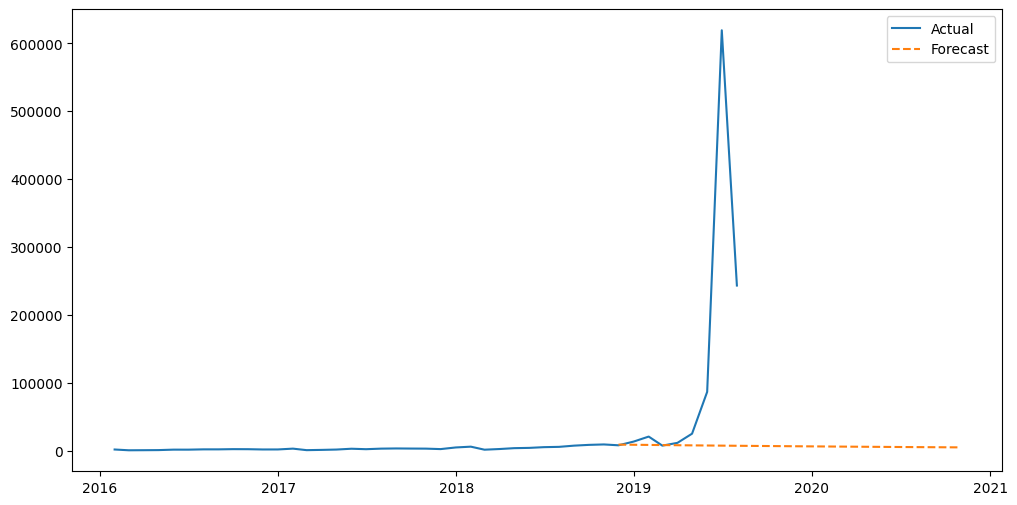

In [66]:
future_predictions = model_fit.forecast(steps=24)
plt.figure(figsize=(12, 6))
plt.plot(monthly_reviews, label="Actual")
plt.plot(future_predictions, label="Forecast", linestyle="dashed")
plt.legend()
plt.show()


# **Key Insights from Forecasting Graph**

## **1. Observed vs. Forecasted Trends**
- The **actual review count shows a sharp increase** in 2019, reaching over **600,000** in a single month.
- The **ARIMA model's forecast remains flat**, failing to capture the sudden surge in Airbnb reviews.

## **2. Forecasting Model Limitations**
- The model **underestimates future values**, suggesting it does not account for sudden exponential growth.
- The **lack of seasonality adjustment** prevents the model from adapting to Airbnb's fluctuating demand.

## **3. Possible Causes of Poor Forecasting**
- **Time Series is Non-Stationary**: The model assumes a stable pattern, but the data shows rapid changes.
- **Extreme Outliers in 2019**: The spike in reviews likely distorts the model's ability to generalize.
- **ARIMA’s Linear Assumptions**: ARIMA struggles with highly nonlinear trends, leading to poor predictions.